### 神经网络参数优化及参数选择
- 网络容量：
可以认为与网络训练参数成正比  <br/>
神经元多，拟合能力越强，越是容易产生过拟合

#### 超参数的选择
超参数，需要人为去设定的参数，神经元个数，学习速率


 提高网络拟合能力：
 - 增加层
 - 增加隐藏神经元数量 ，效果并不明显
 
 
 深度学习的层越来越深？？？<br />
 单层神经元个数不宜太少，采用dense顺序模型，容不下这么多信息，造成信息丢失，会造成欠拟合


In [23]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
(train_image,train_label),(test_image,test_label)=tf.keras.datasets.fashion_mnist.load_data()

 **图片归一化处理**

In [25]:
train_image=train_image/255
test_image=test_image/255

**独热编码**

In [26]:
train_label_onehot=tf.keras.utils.to_categorical(train_label)
test_label_onehot=tf.keras.utils.to_categorical(test_label)

In [27]:
#增加2个隐藏层的结果
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #扁平成向量
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))  #10个输出 为 概率分布

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) 

In [30]:
model.fit(train_image,train_label_onehot,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5829 - acc: 0.7904
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4353 - acc: 0.8415
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4026 - acc: 0.8538
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3764 - acc: 0.8626
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3612 - acc: 0.8689
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3509 - acc: 0.8708A: 1s - loss: 0.3558 - acc: - ETA:
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3432 - acc: 0.8741
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3319 - acc: 0.8779
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3237 - acc: 0.8812
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3179 - acc: 0.

###  dropout 抑制过拟合
- 分布式表征（Distributed Representation），是人工神经网络研究的一个核心思想

    神经元与概念多对多的表示，利用神经网络的分布式特征表达（只要能保留核心特征），既可以实现成功完成任务。于“小红汽车”这个概念，如果用分布式特征地表达，那么就可能是一个神经元代表大小（形状：小），一个神经元代表颜色（颜色：红），还有一个神经元代表车的类别（类别：汽车）。只有当这三个神经元同时被激活时，就可以比较准确地描述我们要表达的物体。

    
- dropout learning 丢弃学习，关键就是保留核心特征
    深度学习网络的训练过程中，对于神经网络单元，按照一定的概率将其暂时从网络中丢弃。
    
  【学习阶段】以概率p主动临时性地忽略掉部分隐藏节点
    1. 首先随机（临时）删掉网络中的一些隐藏神经元，一般情况下输入输出神经元保持不变

    2. 把输入x通过修改后的网络前向传播，删除的神经元不进行前向传播，传给下一层的值是0，然后把得到的损失结果通过修改后的网络反向传播。一小批训练样本执行完这个过程后就按照随机梯度下降法更新没有被删除的神经元对应的参数（w，b）

    3. 恢复被删掉的神经元，此时被删除的神经元保持原样，而没有被删除的神经元已经有所更新

    4. 不断重复上述过程1，2，3：

  【测试阶段】将参与学习的节点和那些被隐藏的节点以一定的概率p加权求和，综合计算得到网络的输出。预测的时候，每一个单元的参数要预乘以p。


In [31]:
histor=model.fit(train_image,train_label_onehot,epochs=10,validation_data=(test_image,test_label_onehot))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3143 - acc: 0.8847 - val_loss: 0.3272 - val_acc: 0.8796
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3093 - acc: 0.8874 - val_loss: 0.3336 - val_acc: 0.8786
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3025 - acc: 0.8899 - val_loss: 0.3471 - val_acc: 0.8781
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - acc: 0.8916 - val_loss: 0.3346 - val_acc: 0.8797
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - acc: 0.8912 - val_loss: 0.3334 - val_acc: 0.8820 - acc: 0.89
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2927 - acc: 0.8932 - val_loss: 0.3351 - val_acc: 0.8802
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2892 - acc: 0.8936 - val_loss: 0.3276 - val_acc: 0.8816
Epoch 8/10
1875/1875 [============================

In [32]:
histor.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

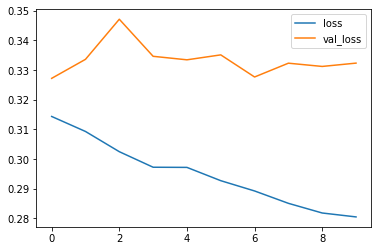

In [33]:
plt.plot(histor.epoch,histor.history.get('loss'),label='loss')
plt.plot(histor.epoch,histor.history.get('val_loss'),label='val_loss')
plt.legend(loc='best')

#### 上图，val_loss损失上升,过拟合,下图正确率显示

在训练数据上得分很高，但是测试数据得分很低

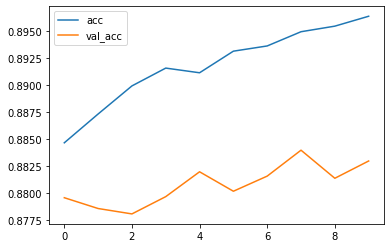

In [34]:
plt.plot(histor.epoch,histor.history.get('acc'),label='acc')
plt.plot(histor.epoch,histor.history.get('val_acc'),label='val_acc')
plt.legend(loc='best')

### 参数选择原则
- 首先，开发一个过拟合的模型：
添加更多的层，每一层变大，训练更多的轮次，

- 然后，抑制过拟合
dropout，正则化，图像增强<br/>
增加数据，交叉验证

减小网络规模，实际中并不咋使用正则化？？？